In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


In [181]:
datasets = pd.read_csv("Salary_Data.csv")
datasets.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [182]:
X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=1/3,random_state = 0)

In [183]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
preds = regressor.predict(X_test)


In [184]:
mean_squared_error(Y_test, preds) 

21026037.329511296

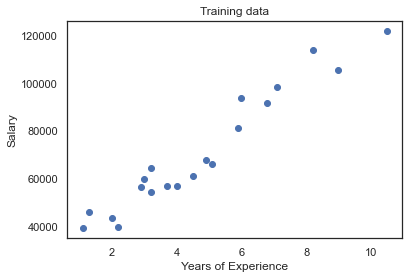

In [185]:
plt.title('Training data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_train, Y_train)
plt.show()

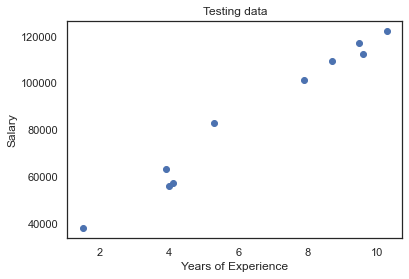

In [186]:
plt.title('Testing data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(X_test, Y_test)
plt.show()

In [209]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
datasets2=pd.read_csv("K-Mean_Dataset.csv")
datasets2.head()
from sklearn.model_selection import train_test_split
X = datasets2.iloc[:, :-1].values
Y = datasets2.iloc[:, 1].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2,random_state = 0)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
datasets2['CUST_ID'] = le.fit_transform(datasets2.CUST_ID.values)
X_new=datasets2.fillna(datasets2.mean())

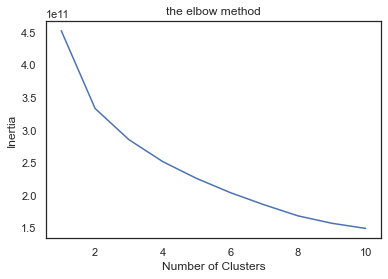

In [210]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_new)
    wcss.append(kmeans.inertia_)
wcss
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [211]:
from sklearn.cluster import KMeans
nclusters = 4 
km = KMeans(n_clusters=nclusters)
km.fit(X_new)
y_cluster_kmeans = km.predict(X_new)
from sklearn import metrics
score = metrics.silhouette_score(X_new, y_cluster_kmeans)
print("silhouette score is:",score)

silhouette score is: 0.24741237225589216


In [212]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_new)
X_scaled_array = scaler.transform(X_new)
X_scaled = pd.DataFrame(X_scaled_array, columns = X_new.columns)

In [213]:
from sklearn.cluster import KMeans
wcs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    wcs.append(kmeans.inertia_)
nclusters = 4 
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)
KMeans(n_clusters=4)
y_cluster_kmeans = km.predict(X_scaled)
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("silhouette score after applying scaling",score)

silhouette score after applying scaling 0.17723203947485178
